# How income, income inequality and universal basic income affect crime rates?

In [1]:
#Importing pandas
import pandas as pd
#Importing numpy
import numpy as np
# Importing matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
#Importing integration package
import scipy.integrate as integrate

In [2]:
#Importing income raw data
df1 = pd.read_csv('Copy of s133UN01qyLD (2).csv')
#Importing race raw data
df2 = pd.read_csv('Copy of s165u1u4BUbp (1).csv')

In [3]:
#Displaying income raw data
df1


,YEAR,STATEFIP,INCTOT
0,1980,23,18919
1,1980,23,8203
2,1980,23,13680
3,1980,23,2802
4,1980,23,0
...,...,...,...
688179,1983,15,999999999
688180,1983,15,35002
688181,1983,15,8502
688182,1983,15,0


In [4]:
type(df1["STATEFIP"][43])

numpy.int64

In [5]:
#Displaying race raw data
df2

,YEAR,STATEFIP,RACE
0,1980,23,100
1,1980,23,100
2,1980,23,100
3,1980,23,100
4,1980,23,100
...,...,...,...
688179,1983,15,100
688180,1983,15,100
688181,1983,15,100
688182,1983,15,100


In [6]:
#Counting the number of null values in race data
countnull = 0
for x in df2["RACE"]:
    if x == None:
        countnull = countnull+1
print(countnull)

0


In [7]:
#Counting the number of values greater than ten million, 9999999, one million, 999999, hundred thousand, ten thousand, 
#one thousand and less than zero respectively to determine what are the values of the erroneous values.
counttenmillion = 0
for x in df1["INCTOT"]:
    if 10000000 < x:
        counttenmillion = counttenmillion+1
print("Number of incomes greater than ten million = " + str(counttenmillion))
counttenmillionlessone = 0
for x in df1["INCTOT"]:
    if 9999999 < x:
        counttenmillionlessone = counttenmillionlessone+1
print("Number of incomes greater than seven figures = " + str(counttenmillionlessone))
countmillion = 0
for x in df1["INCTOT"]:
    if 1000000 < x:
        countmillion = countmillion+1
print("Number of incomes greater than one million = " + str(counttenmillion))
countmillion = 0
for x in df1["INCTOT"]:
    if 999999 < x:
        countmillion = countmillion+1
print("Number of incomes greater than six figures = " + str(countmillion))
countlakh = 0
for x in df1["INCTOT"]:
    if 99999 < x:
        countlakh = countlakh+1
print("Number of incomes greater than hundred thousand = " + str(countlakh))
countlakhs = 0
for x in df1["INCTOT"]:
    if 9999 < x:
        countlakhs = countlakhs+1
print("Number of incomes greater than ten thousands = " + str(countlakhs))
countthousand = 0
for x in df1["INCTOT"]:
    if 999 < x:
        countthousand = countthousand+1
print("Number of incomes greater than a thousand = " + str(countthousand))
countzero = 0
for x in df1["INCTOT"]:
    if x == 0:
        countzero = countzero+1
print("Number of people with zero incomes = " + str(countzero))
countneg = 0
for x in df1["INCTOT"]:
    if 0 > x:
        countneg = countneg+1
print("Number of people with negative income values = " + str(countneg))

Number of incomes greater than ten million = 164506
Number of incomes greater than seven figures = 164506
Number of incomes greater than one million = 164506
Number of incomes greater than six figures = 164506
Number of incomes greater than hundred thousand = 164683
Number of incomes greater than ten thousands = 368763
Number of incomes greater than a thousand = 589688
Number of people with zero incomes = 44076
Number of people with negative income values = 2665


We see there are 44076 unemployed people in this dataset and a further 2665 on government assistance. The vast majority 
of people have an income greater than a thousand and the erroneous values seem to all be greater than six figures. We will now
confirm the value(s) of these missing values.

In [8]:
df1[df1["INCTOT"] > 1000000]["INCTOT"].value_counts()

999999999    164506
Name: INCTOT, dtype: int64

As shown, they are all 999999999.

In [9]:
type(df2["YEAR"][21])

numpy.int64

The reason the number of incomes below 10 million, 7 figure-salaries, one million, six figures, a lakh, ten thousand, one thousand, exactly zero and negative were counted was two-fold. Firstly, many numbers in the orginal csv file were getting set to 999999999 by default if they were above a certain value. I wanted to find what the value above which these values were getting set to 999999999 by default. I found out it was when there were six figures. However, it may very well be that the numbers being set to 999999999 by default were getting set that way due to some other reason like being null or something. I don't know yet but I do hypothesize it will be those values greater than six figures.

In [10]:
#Creating dataframe with positive values less than ten million. The reason I did this was because while downloading the 
#data from IPUMS CPS many values were automatically getting set to 999999999 and so I just split the data with this dataset
#having the known values. I will fill in the mean of all the unknown values later after calculating it for each year.
df3 = df1[(df1.INCTOT<10000000)]

In [11]:
#Displaying income dataframe
df3

,YEAR,STATEFIP,INCTOT
0,1980,23,18919
1,1980,23,8203
2,1980,23,13680
3,1980,23,2802
4,1980,23,0
...,...,...,...
688177,1983,15,33011
688178,1983,15,3338
688180,1983,15,35002
688181,1983,15,8502


In [12]:
#Seeing the number of rows and columns in df3.
df3.shape

(523678, 3)

In [13]:
#This calculation was performed to verify the correct values were used. 
#Number of total original values - Number of values greater than a million = Number of current values in this set
688184-164506

523678

There were originally 688184 values with 164506 values being greater than a million and since we eliminated values greater than
a million, there are now 523678.

In [14]:
#Creating a dataframe with only 700,200 and 100 as values
df4 = df2[((df2.RACE==700) | (df2.RACE==200) | (df2.RACE==100))]

In [15]:
#Displaying race dataframe
df4 

,YEAR,STATEFIP,RACE
0,1980,23,100
1,1980,23,100
2,1980,23,100
3,1980,23,100
4,1980,23,100
...,...,...,...
688179,1983,15,100
688180,1983,15,100
688181,1983,15,100
688182,1983,15,100


In [16]:
#Counting the number of rows and columns in the race dataframe
df4.shape

(688184, 3)

In [17]:
#Splitting race and income dataframes by year
dfinc1980 = df3[df3["YEAR"] == 1980]
dfinc1981 = df3[df3["YEAR"] == 1981]
dfinc1982 = df3[df3["YEAR"] == 1982]
dfinc1983 = df3[df3["YEAR"] == 1983]
dfrace1980 = df4[df4["YEAR"] == 1980]
dfrace1981 = df4[df4["YEAR"] == 1981]
dfrace1982 = df4[df4["YEAR"] == 1982]
dfrace1983 = df4[df4["YEAR"] == 1983]

In [18]:
#Creating a dataframe with only values greater than a million to get what the average income of unreported incomes in each
#state was and the total number of unreported incomes in each state.
df5 = df1[(df1.INCTOT>10000000)]

In [19]:
#Splitting dataframes with high, and poverty-level incomes by year
dfallinc1980 = df1[df1["YEAR"] == 1980]
dfallinc1981 = df1[df1["YEAR"] == 1981]
dfallinc1982 = df1[df1["YEAR"] == 1982]
dfallinc1983 = df1[df1["YEAR"] == 1983]
dfinchigh1980 = df5[df5["YEAR"] == 1980]
dfinchigh1981 = df5[df5["YEAR"] == 1981]
dfinchigh1982 = df5[df5["YEAR"] == 1982]
dfinchigh1983 = df5[df5["YEAR"] == 1983]
dfincpoverty1980 = dfinc1980[dfinc1980["INCTOT"] <4160]
dfincpoverty1981 = dfinc1981[dfinc1981["INCTOT"] <4620]
dfincpoverty1982 = dfinc1982[dfinc1982["INCTOT"] <4901]
dfincpoverty1983 = dfinc1983[dfinc1983["INCTOT"] <5061]

In [20]:
#Checking the unqiue values in df5
list(df5["INCTOT"].unique())

[999999999]

This confirms we have only dropped the values which were getting mutated to 999999999.

Poverty lines were different for different years.

In [21]:
#Printing the codes for the states(e.g 1=Alabama)
dfinc1980["STATEFIP"].unique()

array([23, 33, 50, 25, 44,  9, 36, 34, 42, 39, 18, 17, 26, 55, 27, 19, 29,
       38, 46, 31, 20, 10, 24, 11, 51, 54, 37, 45, 13, 12, 21, 47,  1, 28,
        5, 22, 40, 48, 30, 16, 56,  8, 35,  4, 49, 32, 53, 41,  6,  2, 15],
      dtype=int64)

In [22]:
dfinc1980Alaska = dfinc1980[dfinc1980["STATEFIP"] == 2]
dfinc1981Alaska = dfinc1981[dfinc1981["STATEFIP"] == 2]
dfinc1982Alaska = dfinc1982[dfinc1982["STATEFIP"] == 2]
dfinc1983Alaska = dfinc1983[dfinc1983["STATEFIP"] == 2]

In [23]:
dfinc1980Alaska["INCTOT"]

177397    11700
177398     7800
177400    11828
177403    11205
177404    10900
          ...  
179516     2706
179517     5829
179518    13800
179519    29070
179520     1720
Name: INCTOT, Length: 1520, dtype: int64

In [24]:
a = dfinc1980Alaska["INCTOT"].rank(pct=True)
print(a)

177397    0.584868
177398    0.452632
177400    0.589474
177403    0.571711
177404    0.557895
            ...   
179516    0.269079
179517    0.371053
179518    0.633553
179519    0.866447
179520    0.235526
Name: INCTOT, Length: 1520, dtype: float64


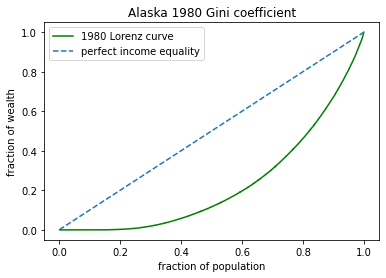

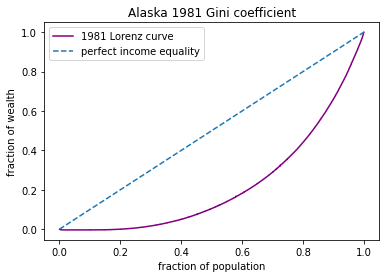

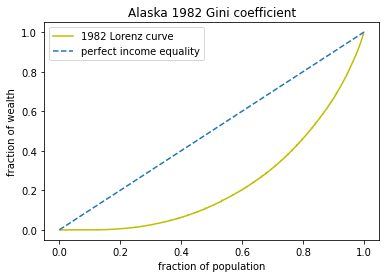

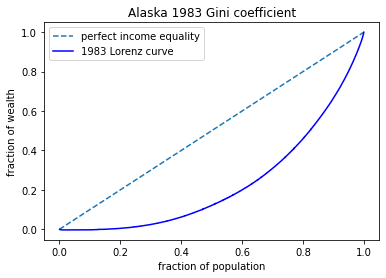

In [25]:
#Visualizing the Gini coefficient for Alaska by year
#Year 1980
plt.figure()
a=(0,1)
b=(0,1)
x1980=dfinc1980Alaska['INCTOT'].sort_values().rank(pct=True)
y1980=dfinc1980Alaska['INCTOT'].sort_values().cumsum()/dfinc1980Alaska['INCTOT'].sum()
plt.xlabel("fraction of population")
plt.ylabel("fraction of wealth")
plt.title("Alaska 1980 Gini coefficient")
plt.plot(x1980,y1980,'g',label="1980 Lorenz curve")
plt.plot(a,b,'--',label = "perfect income equality")
plt.legend()
#Year 1981
plt.figure()
a=(0,1)
b=(0,1)
x1981=dfinc1981Alaska['INCTOT'].sort_values().rank(pct = True)
y1981=dfinc1981Alaska['INCTOT'].sort_values().cumsum()/dfinc1981Alaska['INCTOT'].sum()
plt.xlabel("fraction of population")
plt.ylabel("fraction of wealth")
plt.title("Alaska 1981 Gini coefficient")
plt.plot(x1981,y1981,'purple',label="1981 Lorenz curve")
plt.plot(a,b,'--',label = "perfect income equality")
plt.legend()
#Year 1982
plt.figure()
a=(0,1)
b=(0,1)
x1982=dfinc1982Alaska['INCTOT'].sort_values().rank(pct = True)
y1982=dfinc1982Alaska['INCTOT'].sort_values().cumsum()/dfinc1982Alaska['INCTOT'].sum()
plt.plot(x1982,y1982,'y',label="1982 Lorenz curve")
plt.plot(a,b,'--',label = "perfect income equality")
plt.xlabel("fraction of population")
plt.ylabel("fraction of wealth")
plt.title("Alaska 1982 Gini coefficient")
plt.legend()
#Year 1983
plt.figure()
a=(0,1)
b=(0,1)
x1983=dfinc1983Alaska['INCTOT'].sort_values().rank(pct = True)
y1983=dfinc1983Alaska['INCTOT'].sort_values().cumsum()/dfinc1983Alaska['INCTOT'].sum()
plt.xlabel("fraction of population")
plt.ylabel("fraction of wealth")
plt.title("Alaska 1983 Gini coefficient")
plt.plot(a,b,'--',label = "perfect income equality")
plt.plot(x1983,y1983,'blue',label="1983 Lorenz curve")
plt.legend()

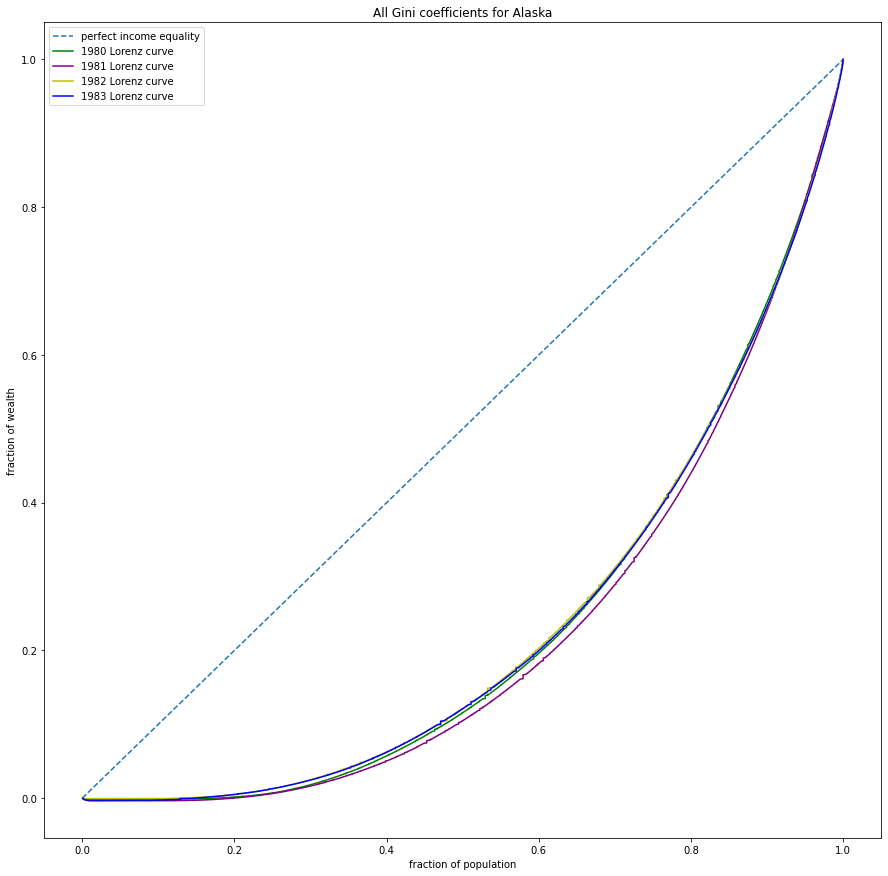

In [26]:
#All 4 of the above plots in one figure
plt.figure(figsize=(15,15))
a=(0,1)
b=(0,1)
plt.xlabel("fraction of population")
plt.ylabel("fraction of wealth")
plt.title("All Gini coefficients for Alaska")
plt.plot(a,b,'--',label = "perfect income equality")
plt.plot(x1980,y1980,'g',label="1980 Lorenz curve")
plt.plot(x1981,y1981,'purple',label="1981 Lorenz curve")
plt.plot(x1982,y1982,'y',label="1982 Lorenz curve")
plt.plot(x1983,y1983,'blue',label="1983 Lorenz curve")
plt.legend()

As can be seen in this figure, the purple 1981 line has the highest level of income inequality and thus should have the highest gini coefficient which we will soon find out whether this is the case or not. 

In [27]:
#Gini coefficients for Alaska across four years
def integrate(x, y):
    area = np.trapz(y=y, x=x)
    return area
alaska1980gc = (0.5 - integrate(x1980, y1980))/0.5
alaska1981gc = (0.5 - integrate(x1981, y1981))/0.5
alaska1982gc = (0.5 - integrate(x1982, y1982))/0.5
alaska1983gc = (0.5 - integrate(x1983, y1983))/0.5
print(alaska1980gc)
print(alaska1981gc)
print(alaska1982gc)
print(alaska1983gc)

0.542290348259215
0.5596715940576646
0.5373998723694707
0.5399634065439455


For Alaska, we see that income inequality increased significantly from 1980 to 1981 but then shot down singnificantly as soon as the Alaska permanent fund was introduced in 1982. This makes a lot of sense as a 1000 dollars means a lot more to people who are unemployed or on benefits compared to people who are wealthy as a percentage of their income. For example, If someone is earning 200 a month their incomes sextuples compared to someone earning 2000 whose income only increases 50%. Also, 1981 does have the highest gini coefficient thus our predictions make sense. 

In [28]:
for x in dfinc1980, dfinc1981, dfinc1982, dfinc1983:
    a = x.sort_values(["STATEFIP"])
    unique_states = a["STATEFIP"].unique()
    print(unique_states)

[ 1  2  4  5  6  8  9 10 11 12 13 15 16 17 18 19 20 21 22 23 24 25 26 27
 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 44 45 46 47 48 49 50 51 53
 54 55 56]
[ 1  2  4  5  6  8  9 10 11 12 13 15 16 17 18 19 20 21 22 23 24 25 26 27
 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 44 45 46 47 48 49 50 51 53
 54 55 56]
[ 1  2  4  5  6  8  9 10 11 12 13 15 16 17 18 19 20 21 22 23 24 25 26 27
 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 44 45 46 47 48 49 50 51 53
 54 55 56]
[ 1  2  4  5  6  8  9 10 11 12 13 15 16 17 18 19 20 21 22 23 24 25 26 27
 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 44 45 46 47 48 49 50 51 53
 54 55 56]


In [29]:
for x in dfinc1980, dfinc1981, dfinc1982, dfinc1983:
    for y in unique_states:
        filtered_df = x[x["STATEFIP"] == y].sort_values(["STATEFIP"])
        avginc = filtered_df["INCTOT"].mean()
        countinc = filtered_df["INCTOT"].count()
        print(countinc, avginc)

2153 7103.102183000465
1520 13105.67302631579
2348 8987.779812606474
2112 7209.192234848485
11498 9920.986345451383
2055 10702.54598540146
1677 10365.410852713178
1491 9149.419852448022
1464 10547.263661202185
4300 8052.96023255814
2365 8645.85243128964
1477 9688.855788761002
1884 8504.501592356688
4907 9990.219686162625
2546 8979.569520816967
2185 8994.972540045766
1865 9255.385522788203
2160 7882.664351851852
2019 7767.397721644378
1873 7401.421249332621
2058 10597.474246841593
2938 9298.379850238258
4238 9680.226050023595
2161 9252.214252660806
1987 7226.312531454454
2351 8811.21437686091
1877 8606.240277037827
1946 8425.778006166496
2194 10078.684594348222
1593 9368.715003138732
3379 9609.467889908257
2553 7692.58401880141
8287 8830.199589718837
2409 8105.809464508095
1961 8292.868944416114
4688 9413.465656996586
2051 8448.413944417358
2155 9228.632482598608
5250 8775.79219047619
1660 9093.381927710843
1638 7420.082417582417
1944 7827.991255144033
1842 7785.475027144408
6578 8644.2

In [30]:
allginiraw = []
for x in dfinc1980, dfinc1981, dfinc1982, dfinc1983:
    for y in unique_states:
        filtered_df = x[x["STATEFIP"] == y].sort_values(["STATEFIP"])
        xgini = list(filtered_df["INCTOT"].sort_values().rank(pct = True))
        ygini = list(filtered_df['INCTOT'].sort_values().cumsum()/filtered_df['INCTOT'].sum())
        giniraw = pd.DataFrame(data=[xgini,ygini]).transpose()
        allginiraw.append(giniraw)
        print(type(giniraw))
print(type(allginiraw))
print(allginiraw)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pand

In [31]:
def integrate(x, y):
    area = np.trapz(y=y, x=x)
    return area
for x in allginiraw:
    gc = (0.5 - integrate(x[0], x[1]))/0.5
    print(gc)

0.5815766692260337
0.542290348259215
0.5561009851189499
0.5534491028982145
0.5438161153904165
0.5289499340870161
0.5295786796306834
0.5571589286809148
0.5295468859966718
0.5259900569018842
0.5583162551268157
0.5041470357938603
0.5506092766511552
0.5391572585255373
0.5259651916110559
0.5307083200241712
0.5110393142169627
0.5593295210068212
0.5824985098916247
0.5229439220597885
0.5476394976950048
0.5330491093278308
0.5422600535063051
0.5358526426226196
0.5654581607077668
0.5323994398421323
0.5488172748890283
0.5377954667869573
0.5213382875776384
0.5029559277240379
0.5482306878958836
0.5823717650540075
0.5561247303676317
0.5393377932903138
0.5517923885305909
0.548531231029171
0.5601888548371672
0.5267871713201164
0.5412665148664799
0.508624859905668
0.5656697388415587
0.544228038837394
0.5525808980732376
0.5664504449713673
0.5333640078073429
0.523546386981603
0.5437904837038854
0.5288803307724894
0.5747303963286032
0.5280494934449796
0.5224622235973826
0.5694867061355298
0.559671594057664

In [32]:
#Calculating the percentage of unreported incomes by year
a = dfinc1980['INCTOT'].count()/dfallinc1980['INCTOT'].count()
b = dfinc1981['INCTOT'].count()/dfallinc1981['INCTOT'].count()
c = dfinc1982['INCTOT'].count()/dfallinc1982['INCTOT'].count()
d = dfinc1983['INCTOT'].count()/dfallinc1983['INCTOT'].count()
print("Percentage of unreported population in 1980= " + str(a))
print("Percentage of unreported population in 1981= " + str(b))
print("Percentage of unreported population in 1982= " + str(c))
print("Percentage of unreported population in 1983= " + str(d))

Percentage of unreported population in 1980= 0.7579178788680243
Percentage of unreported population in 1981= 0.7598341402088686
Percentage of unreported population in 1982= 0.7620019298968058
Percentage of unreported population in 1983= 0.7645525255941218


This means that about 76% of incomes were reported and that about 76% of people did not have a pre-tax personal income of greater than a million dollars in each year while 24% of the data is unreported and thus we will need to estimate it. Therefore, with a,b,c and d representing the percentage of people who weren't reported in each year, we get the equation average mean income in 1980 = unreported mean income in 1980* percentage unreported incomes in 1980+ reported mean incomes in 1980* percentage reported incomes in 1980.


Taking percentage unreported as a,b,c or d depending on the year, the percentage reported as (1-a),(1-b),(1-c),(1-d) and the average pre-tax personal incomes as 21020, 22390, 23430, 24580. We only need unreported mean incomes in each year which are calculated two cells below. The average income is calculated and displayed in the next cell.

In [33]:
#Calculating the mean of reported incomes in each year in each state
e = dfinc1980['INCTOT'].mean()
f = dfinc1981['INCTOT'].mean()
g = dfinc1982['INCTOT'].mean()
h = dfinc1983['INCTOT'].mean()
print("Mean income of reported population in 1980= " + str(e))
print("Mean income of reported population in 1981= " + str(f))
print("Mean income of reported population in 1982= " + str(g))
print("Mean income of reported population in 1983= " + str(h))

Mean income of reported population in 1980= 9017.828051732786
Mean income of reported population in 1981= 9754.323413303146
Mean income of reported population in 1982= 10718.48132763349
Mean income of reported population in 1983= 11317.7068672945


Rearranging the equation for average mean income in terms of unreported mean income we get, avg unreported inc = (avg mean inc - reported mean income * percentage reported)/percent unreported

In [34]:
#Calculating unreported mean incomes by year using average national income in each year
#1980
millionmeaninc1980 = (21020 - 9017.828051732786*0.7579178788680243)/(1-0.7579178788680243)
print("Mean income of high income earners in 1980 = " + str(millionmeaninc1980))
#1981
millionmeaninc1981 = (22390 - 9754.323413303146*0.7598341402088686)/(1-0.7598341402088686)
print("Mean income of high income earners in 1981 = " + str(millionmeaninc1981))
#1982
millionmeaninc1982 = (23430 - 10718.48132763349*0.7579178788680243)/(1-0.7579178788680243)
print("Mean income of high income earners in 1982 = " + str(millionmeaninc1982))
#1983
millionmeaninc1983 = (24580 - 9754.323413303146*0.7598341402088686)/(1-0.7598341402088686)
print("Mean income of high income earners in 1983 = " + str(millionmeaninc1983))

Mean income of high income earners in 1980 = 58596.75561625128
Mean income of high income earners in 1981 = 62366.6164248324
Mean income of high income earners in 1982 = 63227.59936132993
Mean income of high income earners in 1983 = 71485.31465240152


In [35]:
for x in dfrace1980, dfrace1981, dfrace1982, dfrace1983:
    for y in unique_states:
        filtered_df = x[x["STATEFIP"] == y].sort_values(["STATEFIP"])
        countwhite = (filtered_df[filtered_df["RACE"] == 100])["RACE"].count()
        print("Number of white people =" +str(countwhite))

Number of white people =2035
Number of white people =1674
Number of white people =3012
Number of white people =2391
Number of white people =13158
Number of white people =2589
Number of white people =1960
Number of white people =1583
Number of white people =532
Number of white people =4496
Number of white people =2535
Number of white people =640
Number of white people =2597
Number of white people =5447
Number of white people =3153
Number of white people =2747
Number of white people =2235
Number of white people =2562
Number of white people =1995
Number of white people =2357
Number of white people =2024
Number of white people =3541
Number of white people =4942
Number of white people =2750
Number of white people =1834
Number of white people =2676
Number of white people =2312
Number of white people =2410
Number of white people =2577
Number of white people =2031
Number of white people =3858
Number of white people =3294
Number of white people =9101
Number of white people =2465
Number of white

In [36]:
for x in dfrace1980, dfrace1981, dfrace1982, dfrace1983:
    for y in unique_states:
        filtered_df = x[x["STATEFIP"] == y].sort_values(["STATEFIP"])
        countblack = (filtered_df[filtered_df["RACE"] == 200])["RACE"].count()
        print("Number of black people =" +str(countblack))

Number of black people =820
Number of black people =96
Number of black people =61
Number of black people =392
Number of black people =988
Number of black people =51
Number of black people =135
Number of black people =337
Number of black people =1273
Number of black people =888
Number of black people =605
Number of black people =13
Number of black people =2
Number of black people =910
Number of black people =255
Number of black people =52
Number of black people =141
Number of black people =233
Number of black people =796
Number of black people =17
Number of black people =567
Number of black people =145
Number of black people =641
Number of black people =30
Number of black people =837
Number of black people =329
Number of black people =6
Number of black people =76
Number of black people =183
Number of black people =6
Number of black people =462
Number of black people =71
Number of black people =1489
Number of black people =692
Number of black people =11
Number of black people =534
Number

In [37]:
for x in dfrace1980, dfrace1981, dfrace1982, dfrace1983:
    for y in unique_states:
        filtered_df = x[x["STATEFIP"] == y].sort_values(["STATEFIP"])
        countother = (filtered_df[filtered_df["RACE"] == 700])["RACE"].count()
        print("Number of other people =" +str(countother))

Number of other people =6
Number of other people =356
Number of other people =90
Number of other people =22
Number of other people =985
Number of other people =61
Number of other people =19
Number of other people =12
Number of other people =20
Number of other people =75
Number of other people =27
Number of other people =1312
Number of other people =40
Number of other people =86
Number of other people =22
Number of other people =18
Number of other people =16
Number of other people =8
Number of other people =12
Number of other people =19
Number of other people =54
Number of other people =55
Number of other people =89
Number of other people =45
Number of other people =10
Number of other people =33
Number of other people =167
Number of other people =11
Number of other people =88
Number of other people =11
Number of other people =50
Number of other people =239
Number of other people =239
Number of other people =65
Number of other people =145
Number of other people =39
Number of other people

In [38]:
#Importing necessary packages
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
import seaborn as sb

In [39]:
#Loading in the data
df1 = pd.read_csv('finalcleandatasql.csv')

In [40]:
#Splitting the data by year as well as the 2 years right before the implementation of the fund(i.e. dfprefund in 1980,1981)
#and the first 2 years after the fund(i.e. dfpostfund in 1982,1983)
dfprefund = df1[(df1['countyear'] == 1980) | (df1['countyear'] == 1981)]
dfpostfund = df1[(df1['countyear'] == 1982) | (df1['countyear'] == 1983)]
df1980 = df1[(df1['countyear'] == 1980)]
df1981 = df1[(df1['countyear'] == 1981)]
df1982 = df1[(df1['countyear'] == 1982)]
df1983 = df1[(df1['countyear'] == 1983)]

In [41]:
#Taking a high-level look at the data.
df1

,countyear,statefip,serialno,avgincomes,ginicoefficient,ginirank,incrank,knownincscount,knownincsavg,unknownincscount,...,otherpercent,blackcount,othercount,whitecount,totalcount,allareas,totalpop,populationdensity,violentcrime,propertycrime
0,1980,1,1,8066,64.20,3,51,2153,7103,708,...,0,820,6,2035,2861,52423,3893888,74,449,4485.1
1,1980,2,2,12505,58.54,23,1,1520,13106,606,...,16,96,356,1674,2126,656425,401851,0,436,5209.7
2,1980,4,3,9505,60.32,11,26,2348,8988,815,...,2,61,90,3012,3163,114006,2718215,23,651,7519.9
3,1980,5,4,8145,59.84,16,50,2112,7209,693,...,0,392,22,2391,2805,53182,2286435,42,335,3475.9
4,1980,6,5,10179,58.69,21,10,11498,9921,3633,...,6,988,985,13158,15131,163707,23667902,144,894,6939.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,1983,51,200,13115,58.96,25,5,2312,13049,621,...,1,579,46,2308,2933,42769,5564657,130,293,3669.0
200,1983,53,201,12635,58.18,30,12,1782,12401,574,...,3,77,88,2191,2356,71303,4300266,60,372,5706.0
201,1983,54,202,9957,66.33,1,49,1512,8881,478,...,0,54,1,1935,1990,24231,1945061,80,172,2247.2
202,1983,55,203,12132,57.67,34,16,1959,11771,577,...,0,109,25,2402,2536,65503,4721438,72,191,4064.8


In [42]:
for x in df1980, df1981, df1982, df1983:
    y = x.describe()
    print(str(x) + str(y))

    countyear  statefip  serialno  avgincomes  ginicoefficient  ginirank  \
0        1980         1         1        8066            64.20         3   
1        1980         2         2       12505            58.54        23   
2        1980         4         3        9505            60.32        11   
3        1980         5         4        8145            59.84        16   
4        1980         6         5       10179            58.69        21   
5        1980         8         6       10773            55.83        42   
6        1980         9         7       10495            56.16        40   
7        1980        10         8        9571            60.20        12   
8        1980        11         9       10636            55.91        41   
9        1980        12        10        8678            56.56        35   
10       1980        13        11        9241            60.33        10   
11       1980        15        12       10014            53.86        49   
12       198

In [43]:
#Creating summary statistics for each dataset by year
df1980.describe().to_csv("1980summarystatistics")
df1981.describe().to_csv("1981summarystatistics")
df1982.describe().to_csv("1982summarystatistics")
df1983.describe().to_csv("1983summarystatistics")

In [44]:
#Creating a dataset without DC as DC is an outlier due to its small size(area and population), high income and high crime rates
dfwithoutdc = df1[df1['statefip'] != 11] 

In [45]:
#Taking a high-level look at the data without DC.
dfwithoutdc

,countyear,statefip,serialno,avgincomes,ginicoefficient,ginirank,incrank,knownincscount,knownincsavg,unknownincscount,...,otherpercent,blackcount,othercount,whitecount,totalcount,allareas,totalpop,populationdensity,violentcrime,propertycrime
0,1980,1,1,8066,64.20,3,51,2153,7103,708,...,0,820,6,2035,2861,52423,3893888,74,449,4485.1
1,1980,2,2,12505,58.54,23,1,1520,13106,606,...,16,96,356,1674,2126,656425,401851,0,436,5209.7
2,1980,4,3,9505,60.32,11,26,2348,8988,815,...,2,61,90,3012,3163,114006,2718215,23,651,7519.9
3,1980,5,4,8145,59.84,16,50,2112,7209,693,...,0,392,22,2391,2805,53182,2286435,42,335,3475.9
4,1980,6,5,10179,58.69,21,10,11498,9921,3633,...,6,988,985,13158,15131,163707,23667902,144,894,6939.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,1983,51,200,13115,58.96,25,5,2312,13049,621,...,1,579,46,2308,2933,42769,5564657,130,293,3669.0
200,1983,53,201,12635,58.18,30,12,1782,12401,574,...,3,77,88,2191,2356,71303,4300266,60,372,5706.0
201,1983,54,202,9957,66.33,1,49,1512,8881,478,...,0,54,1,1935,1990,24231,1945061,80,172,2247.2
202,1983,55,203,12132,57.67,34,16,1959,11771,577,...,0,109,25,2402,2536,65503,4721438,72,191,4064.8


In [46]:
#Taking a high-level look at the data for the final 2 years before the fund with DC.
dfprefund

,countyear,statefip,serialno,avgincomes,ginicoefficient,ginirank,incrank,knownincscount,knownincsavg,unknownincscount,...,otherpercent,blackcount,othercount,whitecount,totalcount,allareas,totalpop,populationdensity,violentcrime,propertycrime
0,1980,1,1,8066,64.20,3,51,2153,7103,708,...,0,820,6,2035,2861,52423,3893888,74,449,4485.1
1,1980,2,2,12505,58.54,23,1,1520,13106,606,...,16,96,356,1674,2126,656425,401851,0,436,5209.7
2,1980,4,3,9505,60.32,11,26,2348,8988,815,...,2,61,90,3012,3163,114006,2718215,23,651,7519.9
3,1980,5,4,8145,59.84,16,50,2112,7209,693,...,0,392,22,2391,2805,53182,2286435,42,335,3475.9
4,1980,6,5,10179,58.69,21,10,11498,9921,3633,...,6,988,985,13158,15131,163707,23667902,144,894,6939.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,1981,51,98,10794,57.50,33,12,2277,10476,650,...,1,589,50,2288,2927,42769,5444097,127,322,4349.1
98,1981,53,99,10901,58.88,20,10,2108,10595,642,...,6,65,171,2514,2750,71303,4235731,59,447,6294.8
99,1981,54,100,8886,63.93,2,49,2002,7910,647,...,0,66,7,2576,2649,24231,1954124,80,175,2443.9
100,1981,55,101,10666,53.93,47,15,1955,10266,630,...,0,97,16,2472,2585,65503,4726343,72,188,4579.0


In [47]:
#Taking a high-level look at the data for the first 2 years after the fund with DC.
dfpostfund

,countyear,statefip,serialno,avgincomes,ginicoefficient,ginirank,incrank,knownincscount,knownincsavg,unknownincscount,...,otherpercent,blackcount,othercount,whitecount,totalcount,allareas,totalpop,populationdensity,violentcrime,propertycrime
102,1982,1,103,9702,64.45,2,48,1917,8724,624,...,0,573,11,1957,2541,52423,3925266,74,448,4185.8
103,1982,2,104,14499,56.64,37,1,1611,15179,611,...,16,67,373,1782,2222,656425,449606,0,624,5588.8
104,1982,4,105,10990,59.54,16,30,1796,10439,576,...,3,42,78,2252,2372,114006,2889861,25,517,6614.0
105,1982,5,106,9168,61.24,8,51,1579,8108,473,...,1,284,25,1743,2052,53182,2294257,43,325,3546.9
106,1982,6,107,11950,57.66,31,9,11796,11706,3806,...,6,1099,1019,13484,15602,163707,24820009,151,815,6470.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,1983,51,200,13115,58.96,25,5,2312,13049,621,...,1,579,46,2308,2933,42769,5564657,130,293,3669.0
200,1983,53,201,12635,58.18,30,12,1782,12401,574,...,3,77,88,2191,2356,71303,4300266,60,372,5706.0
201,1983,54,202,9957,66.33,1,49,1512,8881,478,...,0,54,1,1935,1990,24231,1945061,80,172,2247.2
202,1983,55,203,12132,57.67,34,16,1959,11771,577,...,0,109,25,2402,2536,65503,4721438,72,191,4064.8


In [48]:
#Creating a dataset without DC for the final 2 years implementation of the fund
dfprefundwithoutdc = dfprefund[dfprefund['statefip'] != 11] 

In [49]:
#Creating a dataset without DC for the first 2 years after the implementation of the fund
dfpostfundwithoutdc = dfpostfund[dfpostfund['statefip'] != 11] 

In [50]:
#Taking a high-level look at the data for the final 2 years before the fund with DC.
dfprefundwithoutdc

,countyear,statefip,serialno,avgincomes,ginicoefficient,ginirank,incrank,knownincscount,knownincsavg,unknownincscount,...,otherpercent,blackcount,othercount,whitecount,totalcount,allareas,totalpop,populationdensity,violentcrime,propertycrime
0,1980,1,1,8066,64.20,3,51,2153,7103,708,...,0,820,6,2035,2861,52423,3893888,74,449,4485.1
1,1980,2,2,12505,58.54,23,1,1520,13106,606,...,16,96,356,1674,2126,656425,401851,0,436,5209.7
2,1980,4,3,9505,60.32,11,26,2348,8988,815,...,2,61,90,3012,3163,114006,2718215,23,651,7519.9
3,1980,5,4,8145,59.84,16,50,2112,7209,693,...,0,392,22,2391,2805,53182,2286435,42,335,3475.9
4,1980,6,5,10179,58.69,21,10,11498,9921,3633,...,6,988,985,13158,15131,163707,23667902,144,894,6939.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,1981,51,98,10794,57.50,33,12,2277,10476,650,...,1,589,50,2288,2927,42769,5444097,127,322,4349.1
98,1981,53,99,10901,58.88,20,10,2108,10595,642,...,6,65,171,2514,2750,71303,4235731,59,447,6294.8
99,1981,54,100,8886,63.93,2,49,2002,7910,647,...,0,66,7,2576,2649,24231,1954124,80,175,2443.9
100,1981,55,101,10666,53.93,47,15,1955,10266,630,...,0,97,16,2472,2585,65503,4726343,72,188,4579.0


In [51]:
#Taking a high-level look at the data for the first 2 years after the fund with DC.
dfpostfundwithoutdc

,countyear,statefip,serialno,avgincomes,ginicoefficient,ginirank,incrank,knownincscount,knownincsavg,unknownincscount,...,otherpercent,blackcount,othercount,whitecount,totalcount,allareas,totalpop,populationdensity,violentcrime,propertycrime
102,1982,1,103,9702,64.45,2,48,1917,8724,624,...,0,573,11,1957,2541,52423,3925266,74,448,4185.8
103,1982,2,104,14499,56.64,37,1,1611,15179,611,...,16,67,373,1782,2222,656425,449606,0,624,5588.8
104,1982,4,105,10990,59.54,16,30,1796,10439,576,...,3,42,78,2252,2372,114006,2889861,25,517,6614.0
105,1982,5,106,9168,61.24,8,51,1579,8108,473,...,1,284,25,1743,2052,53182,2294257,43,325,3546.9
106,1982,6,107,11950,57.66,31,9,11796,11706,3806,...,6,1099,1019,13484,15602,163707,24820009,151,815,6470.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,1983,51,200,13115,58.96,25,5,2312,13049,621,...,1,579,46,2308,2933,42769,5564657,130,293,3669.0
200,1983,53,201,12635,58.18,30,12,1782,12401,574,...,3,77,88,2191,2356,71303,4300266,60,372,5706.0
201,1983,54,202,9957,66.33,1,49,1512,8881,478,...,0,54,1,1935,1990,24231,1945061,80,172,2247.2
202,1983,55,203,12132,57.67,34,16,1959,11771,577,...,0,109,25,2402,2536,65503,4721438,72,191,4064.8


In [52]:
#Creating our model. Taken from https://towardsdatascience.com/linear-regression-in-6-lines-of-python-5e1d0cd05b8d.
X1 = df1.iloc[:,3].values.reshape(-1, 1)
X2 = df1.iloc[:,4].values.reshape(-1, 1)
X3 = dfwithoutdc.iloc[:,3].values.reshape(-1, 1)
X4 = dfwithoutdc.iloc[:,4].values.reshape(-1, 1)
X5 = dfprefundwithoutdc.iloc[:,3].values.reshape(-1, 1)
X6 = dfprefundwithoutdc.iloc[:,4].values.reshape(-1, 1)
X7 = dfpostfundwithoutdc.iloc[:,3].values.reshape(-1, 1)
X8 = dfpostfundwithoutdc.iloc[:,4].values.reshape(-1, 1)
Y1 = df1.iloc[:,21].values.reshape(-1, 1)
Y2 = df1.iloc[:,22].values.reshape(-1, 1)
Y3 = dfwithoutdc.iloc[:,21].values.reshape(-1, 1)
Y4 = dfwithoutdc.iloc[:,22].values.reshape(-1, 1)
Y5 = dfprefundwithoutdc.iloc[:,21].values.reshape(-1, 1)
Y6 = dfprefundwithoutdc.iloc[:,22].values.reshape(-1, 1)
Y7 = dfpostfundwithoutdc.iloc[:,21].values.reshape(-1, 1)
Y8 = dfpostfundwithoutdc.iloc[:,22].values.reshape(-1, 1)
linear_regressor = LinearRegression()
linear_regressor.fit(X1, Y1)
linear_regressor.fit(X1, Y2)
linear_regressor.fit(X2, Y1)
linear_regressor.fit(X2, Y2)
linear_regressor.fit(X3, Y3)
linear_regressor.fit(X3, Y4)
linear_regressor.fit(X4, Y3)
linear_regressor.fit(X4, Y4)
linear_regressor.fit(X5, Y5)
linear_regressor.fit(X5, Y6)
linear_regressor.fit(X6, Y5)
linear_regressor.fit(X6, Y6)
linear_regressor.fit(X7, Y7)
linear_regressor.fit(X7, Y8)
linear_regressor.fit(X8, Y7)
linear_regressor.fit(X8, Y8)
Y_predv1 = linear_regressor.predict(X1) 
Y_predp1 = linear_regressor.predict(X1) 
Y_predv2 = linear_regressor.predict(X2)
Y_predp2 = linear_regressor.predict(X2) 
Y_predv3 = linear_regressor.predict(X3)
Y_predp3 = linear_regressor.predict(X3) 
Y_predv4 = linear_regressor.predict(X4)
Y_predp4 = linear_regressor.predict(X4) 
Y_predv5 = linear_regressor.predict(X5)
Y_predp5 = linear_regressor.predict(X5) 
Y_predv6 = linear_regressor.predict(X6)
Y_predp6 = linear_regressor.predict(X6) 
Y_predv7 = linear_regressor.predict(X7)
Y_predp7 = linear_regressor.predict(X7) 
Y_predv8 = linear_regressor.predict(X8) 
Y_predp8 = linear_regressor.predict(X8) 

In [53]:
#Reading some values of the data.
X1, X2, Y1, Y2

(array([[ 8066],
        [12505],
        [ 9505],
        [ 8145],
        [10179],
        [10773],
        [10495],
        [ 9571],
        [10636],
        [ 8678],
        [ 9241],
        [10014],
        [ 9218],
        [10230],
        [ 9500],
        [ 9444],
        [ 9639],
        [ 8597],
        [ 8670],
        [ 8182],
        [10685],
        [ 9662],
        [10013],
        [ 9662],
        [ 8202],
        [ 9305],
        [ 9191],
        [ 8993],
        [10290],
        [ 9730],
        [ 9923],
        [ 8656],
        [ 9338],
        [ 8835],
        [ 8970],
        [ 9793],
        [ 9018],
        [ 9636],
        [ 9260],
        [ 9489],
        [ 8283],
        [ 8692],
        [ 8545],
        [ 9270],
        [ 9720],
        [ 8764],
        [10055],
        [10547],
        [ 8294],
        [ 9830],
        [10497],
        [ 8974],
        [13525],
        [10459],
        [ 8642],
        [11056],
        [11175],
        [11126],
        [10626

In [84]:
X1.reshape(-1,1)

array([[ 8066],
       [12505],
       [ 9505],
       [ 8145],
       [10179],
       [10773],
       [10495],
       [ 9571],
       [10636],
       [ 8678],
       [ 9241],
       [10014],
       [ 9218],
       [10230],
       [ 9500],
       [ 9444],
       [ 9639],
       [ 8597],
       [ 8670],
       [ 8182],
       [10685],
       [ 9662],
       [10013],
       [ 9662],
       [ 8202],
       [ 9305],
       [ 9191],
       [ 8993],
       [10290],
       [ 9730],
       [ 9923],
       [ 8656],
       [ 9338],
       [ 8835],
       [ 8970],
       [ 9793],
       [ 9018],
       [ 9636],
       [ 9260],
       [ 9489],
       [ 8283],
       [ 8692],
       [ 8545],
       [ 9270],
       [ 9720],
       [ 8764],
       [10055],
       [10547],
       [ 8294],
       [ 9830],
       [10497],
       [ 8974],
       [13525],
       [10459],
       [ 8642],
       [11056],
       [11175],
       [11126],
       [10626],
       [11056],
       [ 9454],
       [10089],
       [

In [89]:
def plot(df):
    x1 = df.iloc[:,3].values.reshape(-1, 1)
    x2 = df.iloc[:,4].values.reshape(-1, 1)
    y1 = df.iloc[:,21].values.reshape(-1, 1) 
    y2 = df.iloc[:,22].values.reshape(-1, 1)
    linear_regressor = LinearRegression()
    linear_regressor.fit(X1, Y1)
    linear_regressor.fit(X2, Y2)
    linear_regressor.fit(X1, Y2)
    linear_regressor.fit(X2, Y1)
    figure1 = sb.regplot(x=x1,y=y1)
    figure2 = sb.regplot(x=x2,y=y2)
    figure3 = sb.regplot(x=x1,y=y2)
    figure4 = sb.regplot(x=x2,y=y1)
    figure1.set_xlabel(str(x1), fontsize = 20)
    figure2.set_xlabel(str(x2), fontsize = 20)
    figure3.set_xlabel(str(x1), fontsize = 20)
    figure4.set_xlabel(str(x2), fontsize = 20)
    figure1.set_ylabel(str(y1), fontsize = 20)
    figure2.set_ylabel(str(y2), fontsize = 20)
    figure3.set_ylabel(str(y2), fontsize = 20)
    figure4.set_ylabel(str(y1), fontsize = 20)

In [54]:
#Adding in constants for our regression.
v1 = sm.add_constant(X1)
v2 = sm.add_constant(X2)
v3 = sm.add_constant(X3)
v4 = sm.add_constant(X4)
v5 = sm.add_constant(X5)
v6 = sm.add_constant(X6)
v7 = sm.add_constant(X7)
v8 = sm.add_constant(X8)

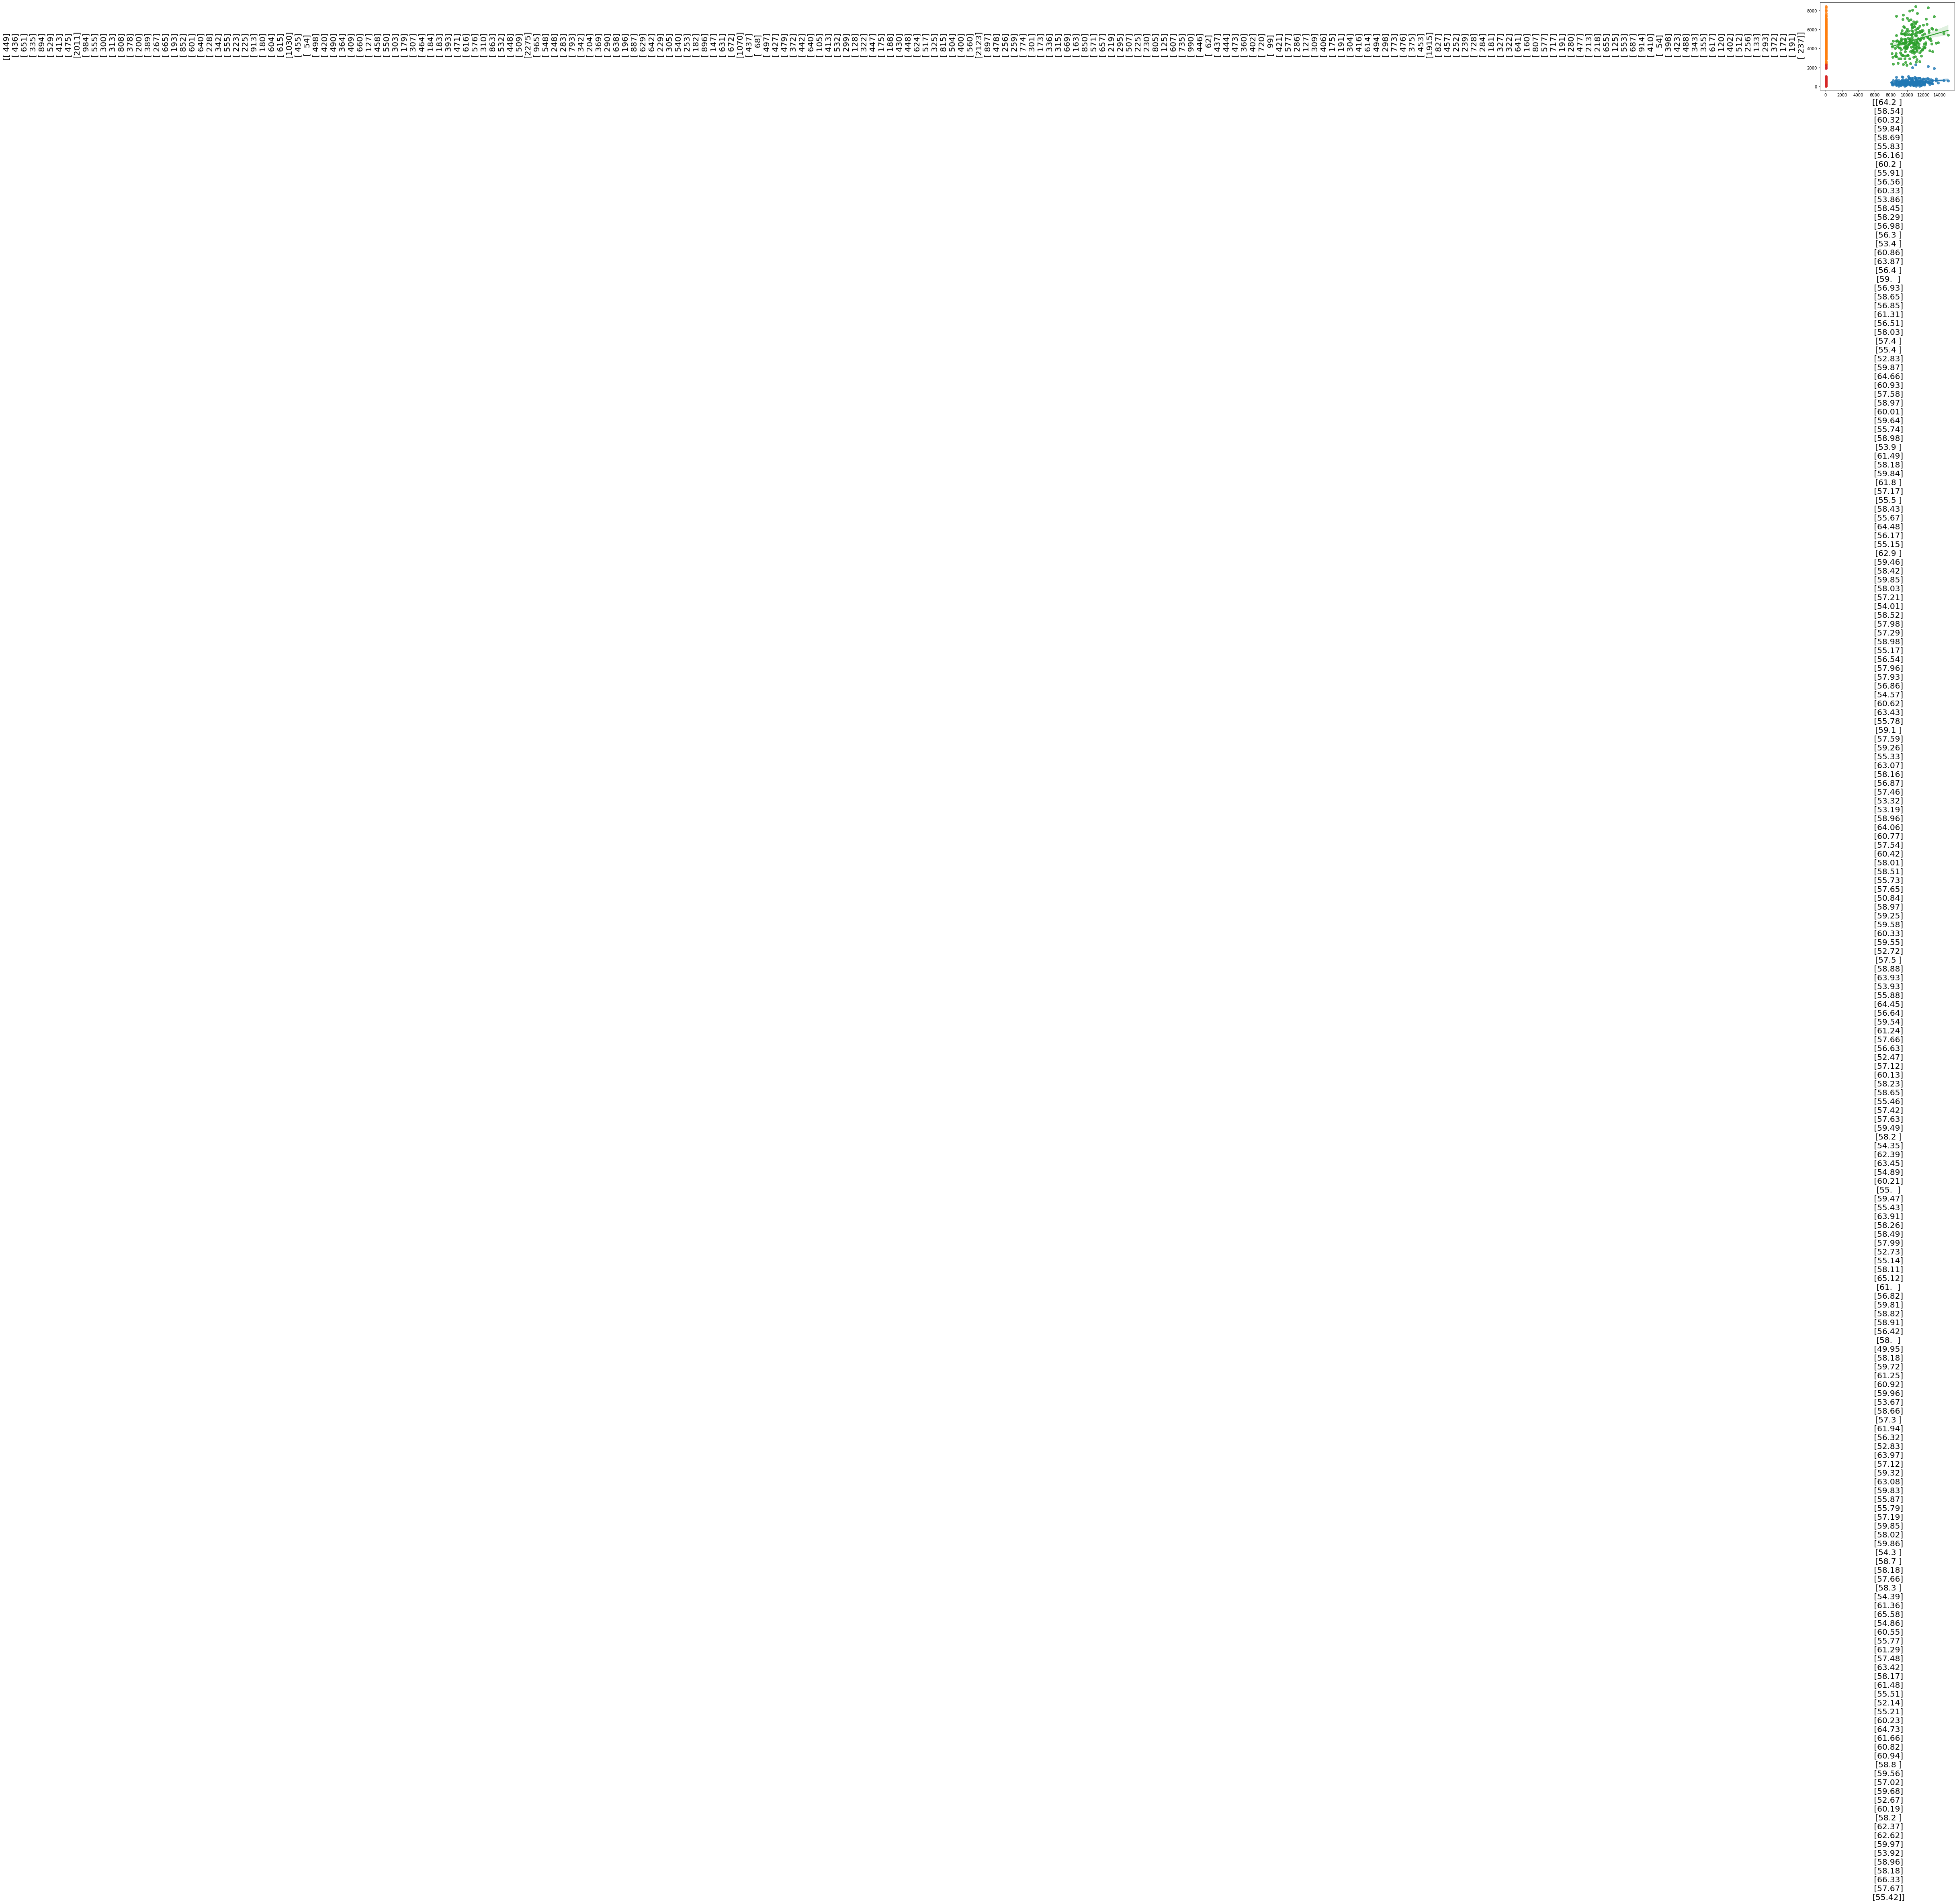

In [90]:
plot(df1)

Text(0.5, 1.0, 'Fig 1. All violent crime rates vs average incomes')

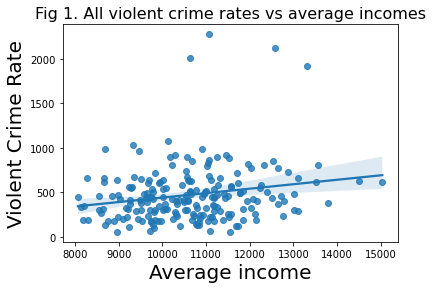

In [55]:
#Visualizing figure 1.
p1 = sb.regplot(x=X1,y=Y1)
p1.set_xlabel("Average income", fontsize = 20)
p1.set_ylabel("Violent Crime Rate", fontsize = 20)
p1.set_title("Fig 1. All violent crime rates vs average incomes", fontsize = 16)

From this plot, we can see there is an outlier which is DC.

Text(0.5, 1.0, 'Fig 2. All property crime rates vs average incomes')

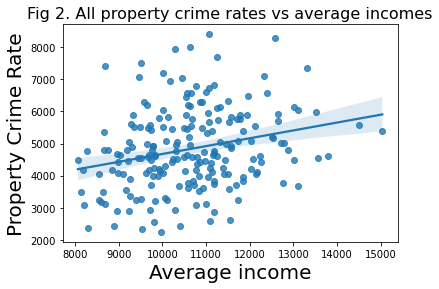

In [56]:
#Visualizing figure 2.
p2 = sb.regplot(x=X1,y=Y2)
p2.set_xlabel("Average income", fontsize = 20)
p2.set_ylabel("Property Crime Rate", fontsize = 20)
p2.set_title("Fig 2. All property crime rates vs average incomes", fontsize = 16)

Text(0.5, 1.0, 'Fig 3. All violent crime rates vs Gini coefficients')

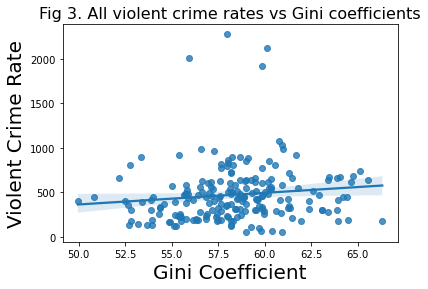

In [57]:
#Visualizing figure 3.
p3 = sb.regplot(x=X2,y=Y1)
p3.set_xlabel("Gini Coefficient", fontsize = 20)
p3.set_ylabel("Violent Crime Rate", fontsize = 20)
p3.set_title("Fig 3. All violent crime rates vs Gini coefficients", fontsize = 16)

From this plot, we can see DC is an outlier for violent crime once again. This means it is best to do our analysis for violent crime without DC altogether as it would skew the results. It is hypothesized DC would have significantly higher violent crime anyway due to the significantly higher population density. I also think the reason it is not an outlier for property crime is because of the significantly higher mean income compared to the other states.

Text(0.5, 1.0, 'Fig 4. All property crime rates vs Gini coefficients')

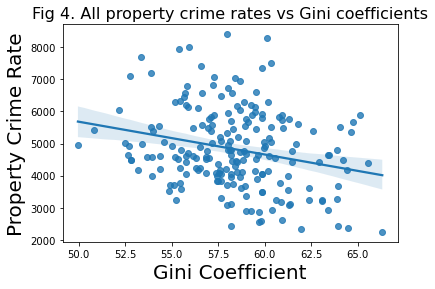

In [58]:
#Visualizing figure 4.
p4 = sb.regplot(x=X2,y=Y2)
p4.set_xlabel("Gini Coefficient", fontsize = 20)
p4.set_ylabel("Property Crime Rate", fontsize = 20)
p4.set_title("Fig 4. All property crime rates vs Gini coefficients", fontsize = 16)

As hypothesized, DC is not an outlier for property crime.

Text(0.5, 1.0, 'Fig 5. All violent crime rates vs average incomes besides DC')

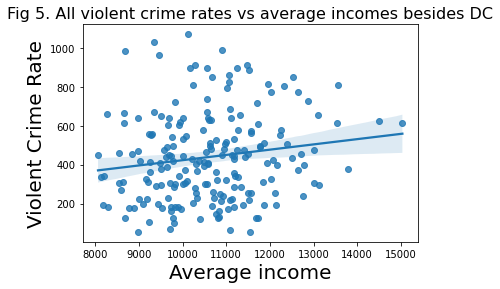

In [59]:
#Visualizing figure 5.
p5 = sb.regplot(x=X3,y=Y3)
p5.set_xlabel("Average income", fontsize = 20)
p5.set_ylabel("Violent Crime Rate", fontsize = 20)
p5.set_title("Fig 5. All violent crime rates vs average incomes besides DC", fontsize = 16)

It can be argued there is a weak positive correlation here although p-values need to be seen to comprehend it better. The correlation is very weak and not that 

Text(0.5, 1.0, 'Fig 6. All property crime rates vs Average Incomes besides DC')

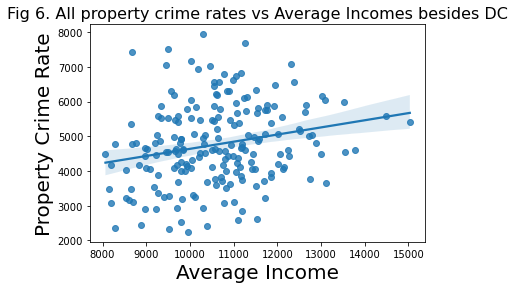

In [60]:
#Visualizing figure 6.
p6 = sb.regplot(x=X3,y=Y4)
p6.set_xlabel("Average Income", fontsize = 20)
p6.set_ylabel("Property Crime Rate", fontsize = 20)
p6.set_title("Fig 6. All property crime rates vs Average Incomes besides DC", fontsize = 16)

Once again, by insepction, there appears to be a weak positive correaltion. The causal reason for this may be that as society becomes ultra-wealthy, there is more to steal and so people commit property crimes due to jealousy.

Text(0.5, 1.0, 'Fig 7. All violent crime rates vs Average incomes besides DC')

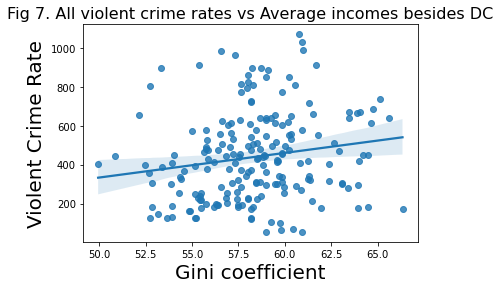

In [61]:
#Visualizing figure 7.
p7 = sb.regplot(x=X4,y=Y3)
p7.set_xlabel("Gini coefficient", fontsize = 20)
p7.set_ylabel("Violent Crime Rate", fontsize = 20)
p7.set_title("Fig 7. All violent crime rates vs Average incomes besides DC", fontsize = 16)

There appears to be no correlation according to the naked eye.

Text(0.5, 1.0, 'Fig 8. All property crime rates vs Gini coefficients besides DC')

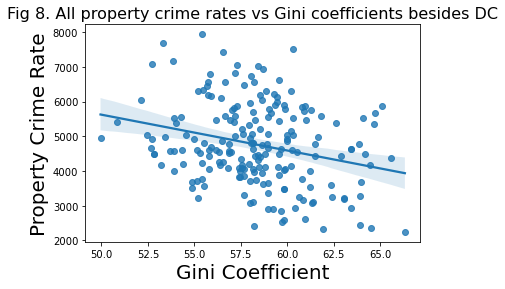

In [62]:
#Visualizing figure 8.
p8 = sb.regplot(x=X4,y=Y4)
p8.set_xlabel("Gini Coefficient", fontsize = 20)
p8.set_ylabel("Property Crime Rate", fontsize = 20)
p8.set_title("Fig 8. All property crime rates vs Gini coefficients besides DC", fontsize = 16)

There appears to be a much stronger negative correlation where property crime goes down as income inequality increases.

Text(0.5, 1.0, 'Fig 9. 1980-81 violent crime rates vs Average incomes besides DC')

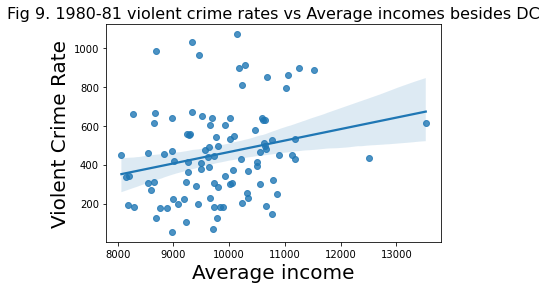

In [63]:
#Visualizing figure 9.
p9 = sb.regplot(x=X5,y=Y5)
p9.set_xlabel("Average income", fontsize = 20)
p9.set_ylabel("Violent Crime Rate", fontsize = 20)
p9.set_title("Fig 9. 1980-81 violent crime rates vs Average incomes besides DC", fontsize = 16)

There appears to be a strongish postive correlation here where violent crime goes up as mean income goes up.

Text(0.5, 1.0, 'Fig 10. 1980-81 property crime rates vs Average incomes besides DC')

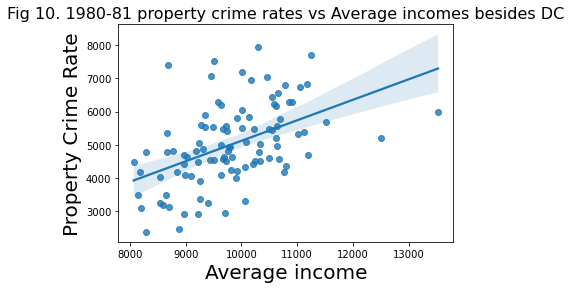

In [64]:
#Visualizing figure 10.
p10 = sb.regplot(x=X5,y=Y6)
p10.set_xlabel("Average income", fontsize = 20)
p10.set_ylabel("Property Crime Rate", fontsize = 20)
p10.set_title("Fig 10. 1980-81 property crime rates vs Average incomes besides DC", fontsize = 16)

There appears to be a very strong postive correlation between property crime going up as income goes up.

Text(0.5, 1.0, 'Fig 11. 1980-81 violent crime rates vs Gini coefficients besides DC')

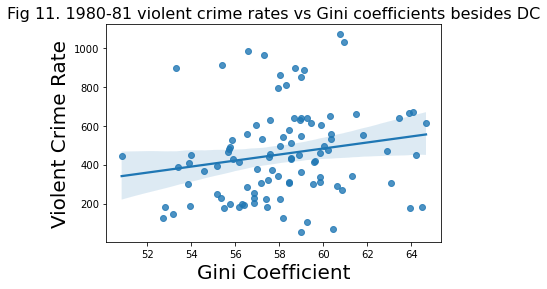

In [65]:
#Visualizing figure 11.
p11 = sb.regplot(x=X6,y=Y5)
p11.set_xlabel("Gini Coefficient", fontsize = 20)
p11.set_ylabel("Violent Crime Rate", fontsize = 20)
p11.set_title("Fig 11. 1980-81 violent crime rates vs Gini coefficients besides DC", fontsize = 16)

There seems to be no correlation here.

Text(0.5, 1.0, 'Fig 12. 1980-81 property crime rates vs Gini coefficients besides DC')

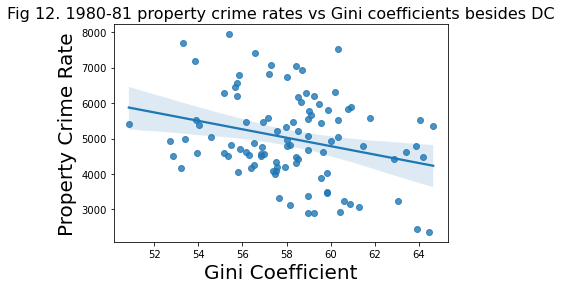

In [66]:
#Visualizing figure 12.
p12 = sb.regplot(x=X6,y=Y6)
p12.set_xlabel("Gini Coefficient", fontsize = 20)
p12.set_ylabel("Property Crime Rate", fontsize = 20)
p12.set_title("Fig 12. 1980-81 property crime rates vs Gini coefficients besides DC", fontsize = 16)

There appears to be a weak negative correlation here.

Text(0.5, 1.0, 'Fig 13. 1982-83 violent crime rates vs Average Incomes besides DC')

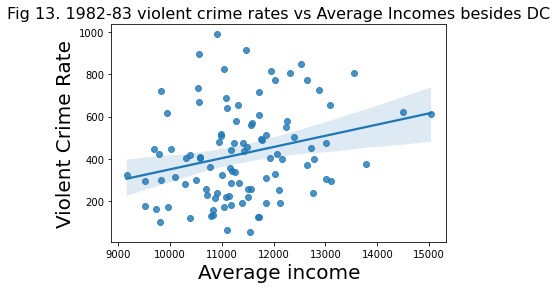

In [67]:
#Visualizing figure 13.
p13 = sb.regplot(x=X7,y=Y7)
p13.set_xlabel("Average income", fontsize = 20)
p13.set_ylabel("Violent Crime Rate", fontsize = 20)
p13.set_title("Fig 13. 1982-83 violent crime rates vs Average Incomes besides DC", fontsize = 16)

There appears to be a weak positive correlation here where violent crime goes up as average income increases. 

Text(0.5, 1.0, 'Fig 14. 1982-83 property crime rates vs Average Incomes besides DC')

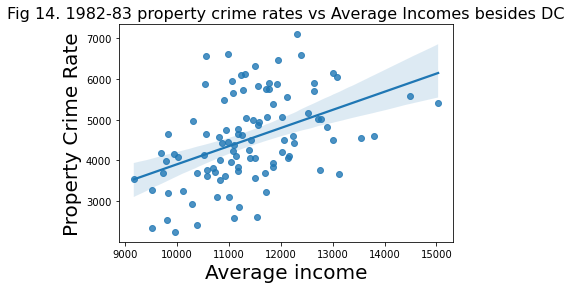

In [68]:
#Visualizing figure 14.
p14 = sb.regplot(x=X7,y=Y8)
p14.set_xlabel("Average income", fontsize = 20)
p14.set_ylabel("Property Crime Rate", fontsize = 20)
p14.set_title("Fig 14. 1982-83 property crime rates vs Average Incomes besides DC", fontsize = 16)

There is a very strong positive correlation here as property crime goes up as average income goes up.

Text(0.5, 1.0, 'Fig 15. 1982-83 violent crime rates vs Gini coefficients besides DC')

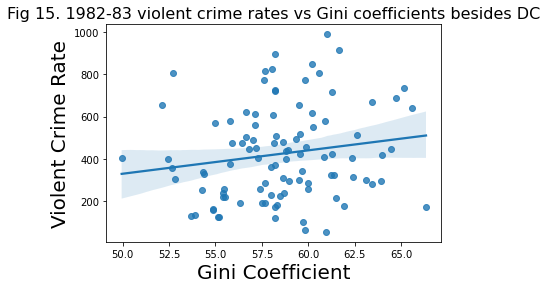

In [69]:
#Visualizing figure 15.
p15 = sb.regplot(x=X8,y=Y7)
p15.set_xlabel("Gini Coefficient", fontsize = 20)
p15.set_ylabel("Violent Crime Rate", fontsize = 20)
p15.set_title("Fig 15. 1982-83 violent crime rates vs Gini coefficients besides DC", fontsize = 16)

There appears to be no correlation between the Gini coefficient and income inequality.

Text(0.5, 1.0, 'Fig 16. 1982-83 property crime rates vs Gini coefficients besides DC')

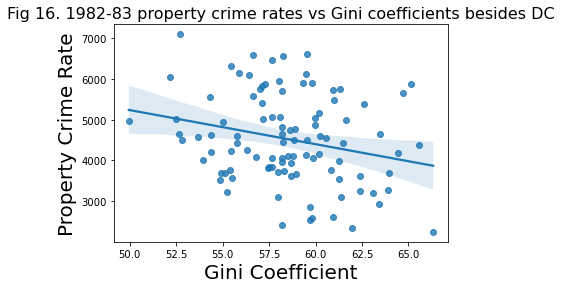

In [70]:
#Visualizing figure 16.
p16 = sb.regplot(x=X8,y=Y8)
p16.set_xlabel("Gini Coefficient", fontsize = 20)
p16.set_ylabel("Property Crime Rate", fontsize = 20)
p16.set_title("Fig 16. 1982-83 property crime rates vs Gini coefficients besides DC", fontsize = 16)

There appears to be a slightly weak negative correlation between property crime and income inequality.

In [71]:
#Fitting a linear regression model to the data which we will get parameters and p-values from later.
res1 = sm.OLS(df1['violentcrime'], v1).fit()
res2 = sm.OLS(df1['propertycrime'], v1).fit()
res3 = sm.OLS(df1['violentcrime'], v2).fit()
res4 = sm.OLS(df1['propertycrime'], v2).fit()
res5 = sm.OLS(dfwithoutdc['violentcrime'], v3).fit()
res6 = sm.OLS(dfwithoutdc['propertycrime'], v3).fit()
res7 = sm.OLS(dfwithoutdc['violentcrime'], v4).fit()
res8 = sm.OLS(dfwithoutdc['propertycrime'], v4).fit()
res9 = sm.OLS(dfprefundwithoutdc['violentcrime'], v5).fit()
res10 = sm.OLS(dfprefundwithoutdc['propertycrime'], v5).fit()
res11 = sm.OLS(dfprefundwithoutdc['violentcrime'], v6).fit()
res12 = sm.OLS(dfprefundwithoutdc['propertycrime'], v6).fit()
res13 = sm.OLS(dfpostfundwithoutdc['violentcrime'], v7).fit()
res14 = sm.OLS(dfpostfundwithoutdc['propertycrime'], v7).fit()
res15 = sm.OLS(dfpostfundwithoutdc['violentcrime'], v8).fit()
res16 = sm.OLS(dfpostfundwithoutdc['propertycrime'], v8).fit()

In [72]:
#Creating a list of fits.
resultslist = [res1,res2,res3,res4,res5,res6,res7,res8,res9,res10,res11,res12,res13,res14,
              res15,res16]

In [73]:
#Creating a lists of parameters.
for (a,b) in zip(resultslist, range(1,17)):
    z = str(a.summary())
    y = "Fig " + str(b) + ".\n" + z
    print(y)

Fig 1.
                            OLS Regression Results                            
Dep. Variable:           violentcrime   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     8.532
Date:                Mon, 02 Jan 2023   Prob (F-statistic):            0.00389
Time:                        16:38:51   Log-Likelihood:                -1461.3
No. Observations:                 204   AIC:                             2927.
Df Residuals:                     202   BIC:                             2933.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -61.1091    183.563     -0.333  

Key findings:-
1) DC is a complete and total outlier because the crime rate(both property and violent) that it significantly skews and subsequently biases the data.
2) We have continuously got statistically significant results at the 5% level that, in general, violent and property increases when there is more income. This makes sense for property crime intuitively as more income means more wealth to steal but not violent crime as you would think more income would mean more investment in the police force which would mean fewer criminals get away with their crimes.
3) Violent crime goes up with more income inequality(as measured by the Gini coefficient) but property crime goes down. These findings are statistically significant also till the 5% level and for property crime at the 0.1% level also. 
4) The only feasible explanation for why this is happening with violent crime is that when income and income inequality increase simultaneously people tend to become violent as an increase in income would mean a better prepared police force(as long as funds are distributed appropriately).
5) An implementation of an universal basic income decreased violent crime by 0.0058 and property crime by 0.1767 incidents for every $1 increase income.
6) Similarly, violent crime went down by 4.4128 and property crime by 34.1578 incidents for every 1 point increase in the Gini coefficient after the implementation of the universal basic income.